<a href="https://colab.research.google.com/github/vantung20146105/BT_tuan7/blob/main/Homework_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=b94f9a8f0d8365f7d2ede0b1ebe06b25fb6aae446e5103c5c959c1b4a76af249
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    # Ve do thi 3D

universe1 = np.linspace(18,30,121)
universe2 = np.linspace(-5,60,131)
universe3 = np.linspace(0,255,256)


sp = ctrl.Antecedent(universe1,'sp')
sensor = ctrl.Antecedent(universe2,'sensor')
pwm = ctrl.Consequent(universe3,'pwm')


sp['1'] = fuzz.trimf(sp.universe,[18,18,21])
sp['2'] = fuzz.trimf(sp.universe,[18,21,24])
sp['3'] = fuzz.trimf(sp.universe,[21,24,27])
sp['4'] = fuzz.trimf(sp.universe,[24,27,30])
sp['5'] = fuzz.trimf(sp.universe,[27,30,30])

sensor['1'] = fuzz.trimf(sensor.universe,[-5,-5,15])
sensor['2'] = fuzz.trimf(sensor.universe,[-5,15,30])
sensor['3'] = fuzz.trimf(sensor.universe,[15,30,45])
sensor['4'] = fuzz.trimf(sensor.universe,[30,45,60])
sensor['5'] = fuzz.trimf(sensor.universe,[45,60,60])

pwm['1'] = fuzz.trimf(pwm.universe,[0,42,84])
pwm['2'] = fuzz.trimf(pwm.universe,[42,84,126])
pwm['3'] = fuzz.trimf(pwm.universe,[84,126,168])
pwm['4'] = fuzz.trimf(pwm.universe,[126,168,210])
pwm['5'] = fuzz.trimf(pwm.universe,[168,210,255])

rule0 = ctrl.Rule(antecedent = ((sp['5'] & sensor['4'])|(sp['3'] & sensor['5'])
                              |(sp['4'] & sensor['5'])|(sp['5'] & sensor['5'])),
                              consequent = pwm['1'],label = 'rule_1')
rule1 = ctrl.Rule(antecedent = ((sp['5'] & sensor['2'])|(sp['5'] & sensor['3'])
                              |(sp['3'] & sensor['4'])|(sp['4'] & sensor['4'])|
                              (sp['2'] & sensor['5'])),
                              consequent = pwm['2'],label = 'rule_2')
rule2 = ctrl.Rule(antecedent = ((sp['5'] & sensor['1'])|(sp['4'] & sensor['2'])
                              |(sp['3'] & sensor['3'])|(sp['4'] & sensor['3'])|
                              (sp['1'] & sensor['4'])|(sp['2'] & sensor['4'])|
                              (sp['1'] & sensor['5'])),
                              consequent = pwm['3'],label = 'rule_3')

rule3 = ctrl.Rule(antecedent = ((sp['4'] & sensor['1'])|(sp['1'] & sensor['2'])
                              |(sp['2'] & sensor['2'])|(sp['3'] & sensor['2'])|
                              (sp['1'] & sensor['3'])|(sp['2'] & sensor['3'])),
                              consequent = pwm['4'],label = 'rule_4')

rule4 = ctrl.Rule(antecedent = ((sp['1'] & sensor['1'])|(sp['2'] & sensor['1'])
                              |(sp['3'] & sensor['1'])),
                              consequent = pwm['5'],label = 'rule_5')

system = ctrl.ControlSystem(rules =[rule0, rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system)
unsampled1 = np.linspace(18,30,121)
unsampled2 = np.linspace(-5,60,131)
x,y = np.meshgrid(unsampled1,unsampled2)
z = np.zeros_like(x)

for i in range(131):
  for j in range(121): 
    sim.input['sp'] = x[i,j]
    sim.input['sensor'] = y[i,j]
    sim.compute() 
    z[i,j] = sim.output['pwm']


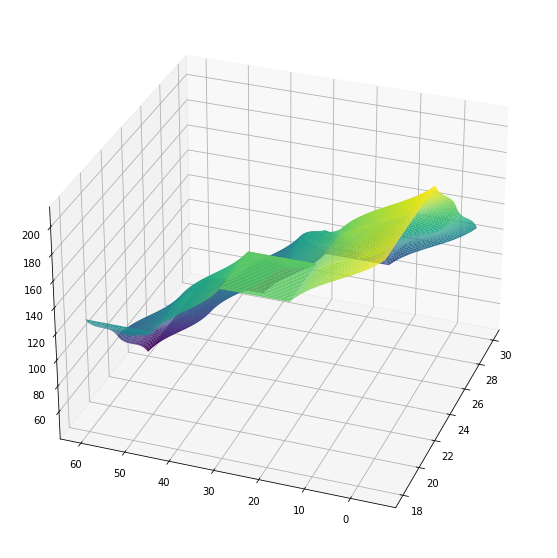

In [5]:
fig = plt.figure(figsize = (10,10))  # Hinh 8x8
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)
#cset = ax.contourf(x,y,z,zdir = 'z', offset = 8, cmap = 'viridis', anpha = 0.5)
#cset = ax.contourf(x,y,z,zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
#cset = ax.contourf(x,y,z,zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30,200)